Se cargan y/o descargar datos de alguna fuente de información financiera. Una parte importante es la descarga de información y donde encontrarla, en este proyecto se descargo la información de Yahoo Finance de manera automática del activo financiero de mi elección (índice accionario, precio
de una acción, precio de una materia prima, (cripto)moneda, etc), en el reporte se describe el activo que
de mi elección.

In [6]:
# Import data manipulation libraries
import math
import scipy.special
import scipy.stats as st
import pandas as pd
import numpy as np

# Import yahoo finance library
import yfinance as yf

# Import cufflinks for visualization
import cufflinks as cf
cf.set_config_file(offline=True)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import scipy.stats for kurtosis, skew
from scipy.stats import kurtosis, skew

# Import scipy.stats for QQ-plot
from scipy import stats
import matplotlib.pyplot as plt

# Import scipy.stats for ACF
from statsmodels.graphics.tsaplots import plot_acf

# Importar las funciones de distribucion normal y t de student
from scipy.stats import norm
from scipy.stats import t


In [7]:
# Obtener datos especificando las fechas de inicio y finalización de los cierres.
ActivoSeleccionado = 'UBS.MC'
df = yf.download(ActivoSeleccionado, start='2008-01-01', progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,0.6400,0.6800,0.6200,0.6400,0.6400,3642616
2008-01-03,0.6400,0.6600,0.6300,0.6300,0.6300,1186389
2008-01-04,0.6500,0.6500,0.5800,0.5900,0.5900,1234040
2008-01-07,0.5600,0.6100,0.5300,0.5600,0.5600,2329145
2008-01-08,0.5700,0.5900,0.5500,0.5500,0.5500,1322985
...,...,...,...,...,...,...
2023-10-03,0.0063,0.0064,0.0058,0.0058,0.0058,196458480
2023-10-04,0.0057,0.0059,0.0055,0.0058,0.0058,140833330
2023-10-05,0.0059,0.0059,0.0056,0.0056,0.0056,65069885


In [8]:
df = yf.download(ActivoSeleccionado, start='2008-01-01', progress=False)['Close']
print(df)
df.iplot(kind='line',title='UBS.MC Price')

Date
2008-01-02    0.6400
2008-01-03    0.6300
2008-01-04    0.5900
2008-01-07    0.5600
2008-01-08    0.5500
               ...  
2023-10-03    0.0058
2023-10-04    0.0058
2023-10-05    0.0056
2023-10-06    0.0053
2023-10-09    0.0053
Name: Close, Length: 4034, dtype: float64


b) Se calculan los rendimientos diarios del activo financiero, en el reporte se muestra la
media, sesgo y exceso de curtosis. El código es capaz de presentar estos resultados.

In [33]:
#Se calculan los retornos normales
print('Se muestran retornos normales')
daily_returns = df.diff().dropna()
print(daily_returns)

# Se usa la función numpy para obterner retornos normales logarítmicos
print('Se muestran retornos normales logarítmicos ')
daily_returns = np.log(df).diff().dropna()


print(daily_returns)
pd.DataFrame({'Mean': round(np.mean(daily_returns),5),'SD': round(np.std(daily_returns),5),'Kurtosis':round(kurtosis(daily_returns,fisher=True),5),'Skew':round(skew(daily_returns),5)},index=['Statistics'])

Se muestran retornos normales
Date
2008-01-03   -0.0100
2008-01-04   -0.0400
2008-01-07   -0.0300
2008-01-08   -0.0100
2008-01-09   -0.0300
               ...  
2023-10-03   -0.0004
2023-10-04    0.0000
2023-10-05   -0.0002
2023-10-06   -0.0003
2023-10-09    0.0000
Name: Close, Length: 4033, dtype: float64
Se muestran retornos normales logarítmicos 
Date
2008-01-03   -0.015748
2008-01-04   -0.065597
2008-01-07   -0.052186
2008-01-08   -0.018018
2008-01-09   -0.056090
                ...   
2023-10-03   -0.066691
2023-10-04    0.000000
2023-10-05   -0.035091
2023-10-06   -0.055060
2023-10-09    0.000000
Name: Close, Length: 4033, dtype: float64


,Mean,SD,Kurtosis,Skew
Statistics,-0.00119,0.05265,47.07225,0.61115


## Log-Return: UBS.MC

In [11]:
#Se grafica de retornos diarios logaritmicos
daily_returns.iplot(title='Retornos diarios logaritmicos')

## Histogram: UBS.MC

In [12]:
#Graficamos el histograma
daily_returns.iplot(kind='histogram', title = 'Histogram of Daily Returns')

## QQ-Plot: UBS.MC

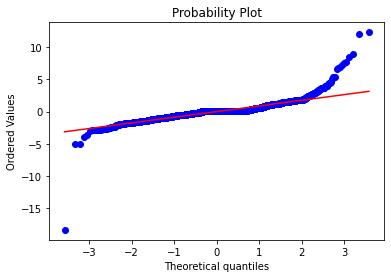

In [13]:
#Se obtiene el QQplot
stats.probplot((daily_returns-np.mean(daily_returns))/np.std(daily_returns), dist="norm", plot=plt)
plt.show()

## ACF: UBS.MC

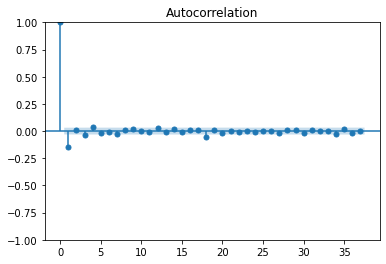

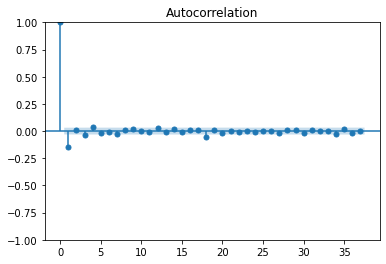

In [14]:
# Se grafica la auto correlacion
plot_acf(daily_returns)

## ACF: Absolute-UBS.MC

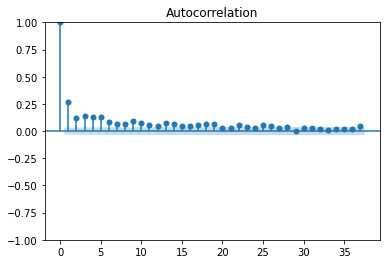

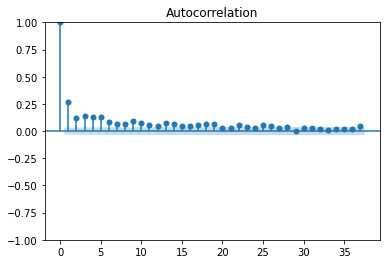

In [15]:
# Se grafica laauto correlacion con valor absoluto
plot_acf(np.abs(daily_returns))

SE calcula el VaR y ES para la serie completa de datos a los siguientes intervalos de confianza:

α = 0,95, 0,975, y 0,99 bajo una aproximación paramétrica asumiendo una distribución normal y t-
student, además bajo una aproximación histórica y Monte Carlo. Se muestran los resultados en una tabla en
el reporte.

In [16]:
returns = df.pct_change().dropna()
returns=returns[-365:]

#Metodo parametrico de VaR

# Calcular media y desviacion estandar
mean = np.mean(returns)
stdev = np.std(returns)
GradosDeLibertad = len(returns) - 1
#Asumiendo una distribuion normal
#Con alpha igual a .95
VaR_95n=norm.ppf(1-0.95,mean,stdev)
print("95% VaR de UBS.MC asumiendo una distribucion normal", round(-VaR_95n*100,4))
#Con alpha igual a .975
VaR_975n=norm.ppf(1-0.975,mean,stdev)
print("975% VaR de UBS.MC asumiendo una distribucion normal", round(-VaR_975n*100,4))
#Con alpha igual a .99
VaR_99n=norm.ppf(1-0.99,mean,stdev)
print("99% VaR de UBS.MC asumiendo una distribucion normal", round(-VaR_99n*100,4))
#Asumiendo una distribuion t
#Con alpha igual a .95
VaR_95t=t.ppf(1-0.95,GradosDeLibertad,mean,stdev)
print("95% VaR de UBS.MC asumiendo una distribucion t", round(-VaR_95t*100,4))
#Con alpha igual a .975
VaR_975t=t.ppf(1-0.975,GradosDeLibertad,mean,stdev)
print("975% VaR de UBS.MC asumiendo una distribucion t", round(-VaR_975t*100,4))
#Con alpha igual a .99
VaR_99t=t.ppf(1-0.99,GradosDeLibertad,mean,stdev)
print("99% VaR de UBS.MC asumiendo una distribucion t", round(-VaR_99t*100,4))


95% VaR de UBS.MC asumiendo una distribucion normal 7.0995
975% VaR de UBS.MC asumiendo una distribucion normal 8.4251
99% VaR de UBS.MC asumiendo una distribucion normal 9.9664
95% VaR de UBS.MC asumiendo una distribucion t 7.1172
975% VaR de UBS.MC asumiendo una distribucion t 8.4526
99% VaR de UBS.MC asumiendo una distribucion t 10.0097


In [17]:
# Metodo historico de VaR
hVaR_95 = returns.quantile(0.05)
hVaR_975 = returns.quantile(0.025)
hVaR_99 = returns.quantile(0.01)
print("95% VaR de UBS.MC ", round(-hVaR_95*100,4))
print("975% VaR de UBS.MC ", round(-hVaR_975*100,4))
print("99% VaR de UBS.MC ", round(-hVaR_99*100,4))

95% VaR de UBS.MC  4.6875
975% VaR de UBS.MC  6.2857
99% VaR de UBS.MC  7.9217


In [18]:
# Metodo Monte Carlo de VaR

# Numero de simulaciones
n_sims = 50000

# Simulacion de retornos para una distribucion normal
sim_returnsn = np.random.normal(mean, stdev, n_sims)
MCVaR_95n = np.percentile(sim_returnsn, 5)
MCVaR_975n = np.percentile(sim_returnsn, 2.5)
MCVaR_99n = np.percentile(sim_returnsn, 1)
print("95% VaR de UBS.MC asumiendo una distribucion normal:", round(-MCVaR_95n*100,4))
print("975% VaR de UBS.MC asumiendo una distribucion normal:", round(-MCVaR_975n*100,4))
print("99% VaR de UBS.MC asumiendo una distribucion normal:", round(-MCVaR_99n*100,4))
# Simulacion de retornos para una distribucion t
sim_returnst = mean + stdev*np.random.standard_t(GradosDeLibertad, n_sims)
MCVaR_95t = np.percentile(sim_returnst, 5)
MCVaR_975t = np.percentile(sim_returnst, 2.5)
MCVaR_99t = np.percentile(sim_returnst, 1)

print("95% VaR de UBS.MC asumiendo una distribucion t:", round(-MCVaR_95t*100,4))
print("975% VaR de UBS.MC asumiendo una distribucion t:", round(-MCVaR_975t*100,4))
print("99% VaR de UBS.MC asumiendo una distribucion t:", round(-MCVaR_99t*100,4))

95% VaR de UBS.MC asumiendo una distribucion normal: 7.0742
975% VaR de UBS.MC asumiendo una distribucion normal: 8.4309
99% VaR de UBS.MC asumiendo una distribucion normal: 9.9659
95% VaR de UBS.MC asumiendo una distribucion t: 7.1251
975% VaR de UBS.MC asumiendo una distribucion t: 8.4952
99% VaR de UBS.MC asumiendo una distribucion t: 9.9807


In [19]:
#Metodo Monte Carlo de CVaR
#Asumiendo una distribucion normal
MCCVaR_95n=returns[returns<=MCVaR_95n].mean()
print("95% CVaR de UBS.MC asumiendo una distribucion normal:", round(-MCCVaR_95n*100,4))
MCCVaR_975n=returns[returns<=MCVaR_975n].mean()
print("975% CVaR de UBS.MC asumiendo una distribucion normal:", round(-MCCVaR_975n*100,4))
MCCVaR_99n=returns[returns<=MCVaR_99n].mean()
print("99% CVaR de UBS.MC asumiendo una distribucion normal:", round(-MCCVaR_99n*100,4))
#Asumiendo una distribucion t
MCCVaR_95t=returns[returns<=MCVaR_95t].mean()
print("95% CVaR de UBS.MC asumiendo una distribucion t:", round(-MCCVaR_95t*100,4))
MCCVaR_975t=returns[returns<=MCVaR_975t].mean()
print("975% CVaR de UBS.MC asumiendo una distribucion t:", round(-MCCVaR_975t*100,4))
MCCVaR_99t=returns[returns<=MCVaR_99t].mean()
print("99% CVaR de UBS.MC asumiendo una distribucion t:", round(-MCCVaR_99t*100,4))

95% CVaR de UBS.MC asumiendo una distribucion normal: 8.72
975% CVaR de UBS.MC asumiendo una distribucion normal: 10.1013
99% CVaR de UBS.MC asumiendo una distribucion normal: 10.9211
95% CVaR de UBS.MC asumiendo una distribucion t: 8.72
975% CVaR de UBS.MC asumiendo una distribucion t: 10.9211
99% CVaR de UBS.MC asumiendo una distribucion t: 10.9211


In [20]:
#Metodo historico de CVaR
hCVaR_95=returns[returns<=hVaR_95].mean()
print("95% CVaR de UBS.MC:", round(-hCVaR_95*100,4))
hCVaR_975=returns[returns<=hVaR_975].mean()
print("975% CVaR de UBS.MC: ", round(-hCVaR_975*100,4))
hCVaR_99=returns[returns<=hVaR_99].mean()
print("99% CVaR de UBS.MC:", round(-hCVaR_99*100,4))


95% CVaR de UBS.MC: 6.5486
975% CVaR de UBS.MC:  8.0323
99% CVaR de UBS.MC: 9.6251


In [21]:
#Metodo parametrico de CVaR
#asumiendo una distribucion normal
normal = norm.ppf(mean,stdev)
#---------------------------------------
CVaR_95n = mean - (stdev / (1 - .95)) * st.norm.pdf(st.norm.ppf(1 - .95))
print('95% CVaR de UBS.MC asumiendo un distribucion normal:', round(-CVaR_95n*100,4 ))
CVaR_975n = mean - (stdev / (1 - .975)) * st.norm.pdf(st.norm.ppf(1 - .975))
print('975% CVaR de UBS.MC asumiendo un distribucion normal:', round(-CVaR_975n*100,4 ))
CVaR_99n = mean - (stdev / (1 - .99)) * st.norm.pdf(st.norm.ppf(1 - .99))
print('99% CVaR de UBS.MC asumiendo un distribucion normal:', round(-CVaR_99n*100,4 ))
#asumiendo una distribucion t
t_critico95 = t.ppf(.95, GradosDeLibertad)
CVaR_95t = -(mean + stdev * t.pdf(t_critico95, GradosDeLibertad) / (1 - .95))
print('95% CVaR de UBS.MC asumiendo un distribucion t:', round(-CVaR_95t*100,4 ))
t_critico975 = t.ppf(.975, GradosDeLibertad)
CVaR_975t = -(mean + stdev * t.pdf(t_critico975, GradosDeLibertad) / (1 - .975))
print('975% CVaR de UBS.MC asumiendo un distribucion t:', round(-CVaR_975t*100,4 ))
t_critico99 = t.ppf(.99, GradosDeLibertad)
CVaR_99t = -(mean + stdev * t.pdf(t_critico99, GradosDeLibertad) / (1 - .99))
print('99% CVaR de UBS.MC asumiendo un distribucion t:', round(-CVaR_99t*100,4 ))

95% CVaR de UBS.MC asumiendo un distribucion normal: 8.8574
975% CVaR de UBS.MC asumiendo un distribucion normal: 10.0146
99% CVaR de UBS.MC asumiendo un distribucion normal: 11.392
95% CVaR de UBS.MC asumiendo un distribucion t: 8.4435
975% CVaR de UBS.MC asumiendo un distribucion t: 9.5707
99% CVaR de UBS.MC asumiendo un distribucion t: 10.9003


In [22]:
tabla = pd.DataFrame({'VaR (Parametrico) distribucion normal':[-VaR_95n*100,-VaR_975n*100,-VaR_99n*100], 'VaR (MonteCarlo) distribucion normal':[-MCVaR_95n*100,-MCVaR_975n*100,-MCVaR_99n*100], 'CVaR (Parametrico) distribucion normal': [-CVaR_95n*100,-CVaR_99n*100,-CVaR_99n*100], 'CVaR (Monte Carlo) distribucion normal': [-MCCVaR_95n*100,-MCCVaR_99n*100,-MCCVaR_99n*100], 'VaR (Parametrico) distribucion t':[-VaR_95t*100,-VaR_975t*100,-VaR_99t*100], 'VaR (MonteCarlo) distribucion t':[-MCVaR_95t*100,-MCVaR_975t*100,-MCVaR_99t*100], 'CVaR (Parametrico) distribucion t': [-CVaR_95t*100,-CVaR_99t*100,-CVaR_99t*100], 'CVaR (Monte Carlo) distribucion t': [-MCCVaR_95t*100,-MCCVaR_99t*100,-MCCVaR_99t*100],'VaR (historico)':[-hVaR_95*100,-hVaR_975*100,-hVaR_99*100],'CVaR (historico)':[-hCVaR_95*100,-hCVaR_975*100,-hCVaR_99*100]},index=['95% de Confianza','975% de Confianza','99% de Confianza'])
tabla

,VaR (Parametrico) distribucion normal,VaR (MonteCarlo) distribucion normal,CVaR (Parametrico) distribucion normal,CVaR (Monte Carlo) distribucion normal,VaR (Parametrico) distribucion t,VaR (MonteCarlo) distribucion t,CVaR (Parametrico) distribucion t,CVaR (Monte Carlo) distribucion t,VaR (historico),CVaR (historico)
95% de Confianza,7.099495,7.074178,8.857370,8.720031,7.117151,7.125135,8.443509,8.720031,4.687499,6.548638
975% de Confianza,8.425120,8.430927,11.392009,10.921118,8.452627,8.495186,10.900323,10.921118,6.285712,8.032253
99% de Confianza,9.966446,9.965914,11.392009,10.921118,10.009726,9.980725,10.900323,10.921118,7.921697,9.625124


En el mercado, el VaR y el ES son las medidas populares para medir el riesgo de una
cartera o un activo, sin embargo, es común ver que usan rolling windows, es decir, se fija una ventana de X
días y con esos datos calcular el VaR o ES del día X + 1, ejemplo: con una ventana de 252 retornos
(r1, r2, ..., r252) calculas el VaRα asociado al retorno 253, ahora el V aRα asociado al retorno 254 viene
del conjunto de datos (r2, r3, ..., r253), etc. Con esto en mente en una sola gráfica se muestran las ganancias y
pérdidas, además del VaR y el ES con α = 0,95 y 0,99 con una rolling window de 252 retornos (una serie de tiempo), el VaRtα es calculado con los retornos r1, r2, ..., r252, se busca predecir el retorno r253, y el VaRt+1 α calculado con los retornos r2, r3, ..., r253, se busca predecir el
retorno r254, etc. El código realiza los resultados gráficos y se muestran en el reporte. 
La estimación del VaR y ES es histórico y paramétrico (se asume una distribución normal
por practicidad)

Text(0.5, 1.0, 'A un nivel de confianza de .99')

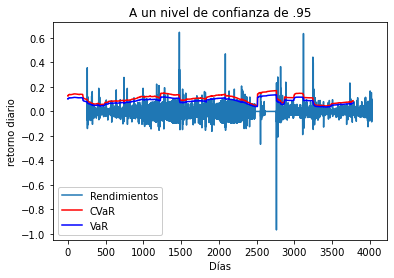

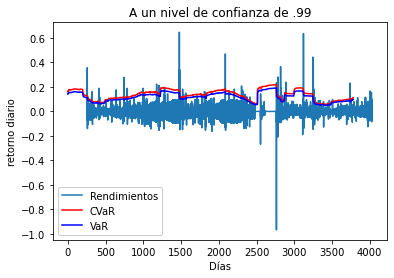

In [23]:
datos = pd.DataFrame()
datos["Precio"] = df.dropna()
datosDiarios = datos.copy()
datosDiarios['precio del día Anterior'] = datosDiarios['Precio'].shift(1)
datosDiarios['Retornos'] = daily_returns
datosDiarios = datosDiarios.dropna()
datosDiarios = datosDiarios.reset_index(drop=True)
#Creamos una funcion para obtener VaR y CVaR
def VaRyCVaR(NivelDeConfianza,datosDiarios, ventanas):
   VaR = []
   CVaR = []
   #Recorremos la columna de retornos para aplicar rolling window
   for i in range(len(datosDiarios)-ventanas):
      #transformamos a serie para su manipulacion
      serie = datosDiarios.iloc[i:ventanas+i, [2]].squeeze()
      #Se ajusta a una distribucion normal
      parametros = norm.fit(-serie)
      #Se calcula VaR
      calculoVaR = norm.ppf(NivelDeConfianza, parametros[0],parametros[1])
      perdidaDeCola = norm.expect(lambda y: y, loc = parametros[0], scale = parametros[1], lb = calculoVaR)
      calculoCVaR = (1/(1-NivelDeConfianza))*perdidaDeCola
      #Se agregan los valores obtenidos a las listas de VaR y CVaR
      VaR.append(calculoVaR)
      CVaR.append(calculoCVaR)
      valores = [VaR, CVaR]
   return valores

#Aplicamos la funcion
#Tomamos el día 252 que nos pide el ejercicio
serie = datosDiarios.iloc[252:, [2]].squeeze()
#Asignamos el nuevo indice
indice = list(range(0,len(datosDiarios)))
#Se caclulan VaR y CVaR a un nivel de confianza de .95
VarCVaR95 = VaRyCVaR(.95, datosDiarios, 252) 
VaR95 =  VarCVaR95[0]
CVar95 = VarCVaR95[1]
#Se caclulan VaR y CVaR a un nivel de confianza de .99
VarCVaR99 = VaRyCVaR(.99, datosDiarios, 252) 
VaR99 =  VarCVaR99[0]
CVar99 = VarCVaR99[1]
plt.figure()
plt.plot(serie, label = "Rendimientos")
plt.plot(CVar95, label = "CVaR", color = 'red')
plt.plot(VaR95, label = "VaR", color = 'blue')
plt.xlabel("Días")
plt.ylabel("retorno diario")
plt.legend(framealpha = 1, frameon = True)
plt.title("A un nivel de confianza de .95")

plt.figure()
plt.plot(serie, label = "Rendimientos")
plt.plot(CVar99, label = "CVaR", color = 'red')
plt.plot(VaR99, label = "VaR", color = 'blue')
plt.xlabel("Días")
plt.ylabel("retorno diario")
plt.legend(framealpha = 1, frameon = True)
plt.title("A un nivel de confianza de .99")


      


Para saber la eficiencia de nuestras estimaciones se calcula el número de
veces que la pérdida fue superior a la estimación usando Var o ES, es decir, definiremos violación si r253 < V aRtα o EStα donde el VaRtα o EStα fue calculado con los retornos r1, r2, ..., r252, o si r254 < V aRtα o EStα donde el V aRtα o EStα fue calculado con los retornos r2, r3, ..., r253, etc. En una tabla se reporta el número de violaciones y como porcentaje del tamaño de la muestra para cada nivel de confianza y cada medida de riesgo. El código genera esos resultados por si solo. 

Nota: Una buena estimación genera un porcentaje de violaciones menores al 2.5 %

In [24]:
#Creamos un DataFrame para guardar los datos
estimacionVaRyCVaR = pd.DataFrame()
#Creamos las columnas para cada VaR y CVaR
estimacionVaRyCVaR['VaR 95%'] = VarCVaR95[0]
estimacionVaRyCVaR['CVaR 95%'] = VarCVaR95[1]
estimacionVaRyCVaR['VaR 99%'] = VarCVaR99[0]
estimacionVaRyCVaR['CVaR 99%'] = VarCVaR99[1]
#Tomamos los rretornos despues del día 252
retornosc = datosDiarios['Retornos'].shift(-252).dropna().reset_index(drop=True)
retornosc.colums = ['Retornos']
#Uniendo los datos anteriores
metricasRetornos = pd.concat([estimacionVaRyCVaR, retornosc], axis = 1)
metricasRetornos.dropna()



,VaR 95%,CVaR 95%,VaR 99%,CVaR 99%,Retornos
0,0.102481,0.126909,0.142320,0.162130,0.000000
1,0.102416,0.126843,0.142254,0.162063,0.074108
2,0.102021,0.126488,0.141925,0.161767,0.068993
3,0.101727,0.126242,0.141709,0.161590,-0.068993
4,0.102146,0.126716,0.142217,0.162142,0.000000
...,...,...,...,...,...
3776,0.069043,0.085884,0.096510,0.110167,-0.066691
3777,0.069558,0.086479,0.097155,0.110877,0.000000
3778,0.069558,0.086479,0.097155,0.110877,-0.035091
3779,0.069574,0.086497,0.097174,0.110898,-0.055060


In [25]:
#Definimos las variables de conteo de viiolaciones 
errorVaR95 = 0
errorCVaR95 = 0
errorVaR99 = 0
errorCVaR99 = 0
#Hacemos el conteo
for i in range(len(metricasRetornos)-1):
    retornoi = metricasRetornos.loc[i+1]["Retornos"]
    #Con un nivel de confianza de .95
    VaRi = metricasRetornos.loc[i]['VaR 95%']
    if retornoi > VaRi:
        #contamos errores de VaR
        errorVaR95 = errorVaR95 + 1
    CVaRi = metricasRetornos.loc[i]['CVaR 95%']
    if retornoi > CVaRi:
        #contamos errores de CVaR
        errorCVaR95 = errorCVaR95 + 1
        #Con un nivel de confianza de .99
    VaRi = metricasRetornos.loc[i]['VaR 99%']
    if retornoi > VaRi:
        #contamos errores de VaR
        errorVaR99 = errorVaR99 + 1
    CVaRi = metricasRetornos.loc[i]['CVaR 99%']
    if retornoi > CVaRi:
        #contamos errores de CVaR
        errorCVaR99 = errorCVaR99 + 1
#Creamo un DataFrame que recopilara los datos
violaciones = pd.DataFrame()
#Creamos listas que van a contener los errores
VaRv = [errorVaR95, errorVaR99]
CVaRv =[errorCVaR95, errorCVaR99]

#Se calcularan porentajes
DeVaRv = [errorVaR95/len(metricasRetornos)*100, errorVaR99/len(metricasRetornos)*100 ]
DeCVaRv = [errorCVaR95/len(metricasRetornos)*100, errorCVaR99/len(metricasRetornos)*100 ]

#Recopilamos los datos en el  Data Frame
violaciones['Nivel de confianza'] = ['95%', '99%']
violaciones['Violaciones de Var'] = VaRv
violaciones['Violaciones de CVar'] = CVaRv
violaciones["Violaciones de Var en porcentaje"] = DeVaRv
violaciones["Violaciones de CVar en porcentaje"] = DeCVaRv
violaciones

,Nivel de confianza,Violaciones de Var,Violaciones de CVar,Violaciones de Var en porcentaje,Violaciones de CVar en porcentaje
0,95%,135,86,3.570484,2.274531
1,99%,69,51,1.824914,1.348850
